# ALGORITMO GENÉTICO PARA OTIMIZAR CAMPANHAS DE MARKETING

Uma empresa de comércio eletrônico quer maximizar o lucro de suas campanhas de marketing. Para isso, ela pode investir em diferentes canais de marketing: TikTok, Facebook, Instagram, Email Marketing, Influenciadores Digitais e YouTube.

Objetivo: Distribuir o orçamento de marketing de forma a maximizar o lucro, considerando o custo por conversão, o número esperado de conversões por $1000 e o lucro por conversão. TODOS OS DADOS SÃO FICTÍCIOS.

Neste código, implementei elitismo e crossover juntos. O elitismo foi feito para selecionar os n melhores indivíduos de uma geração x e passar automaticamente estes indivíduos para a próxima geração (x+1). No crossover, todos os indivíduos da geração x, inclusive os que foram selecionados para a próxima geração (x+1), participaram do sorteio para serem pais pelo método da roleta viciada. Assim, passo os melhores indivíduos para a próxima geração e ainda garanto no crossover poder ter genes bons de algum cromossomo que tem a maior parte dos genes ruins, ou seja, há maior diversidade por não eliminar os cromossomos "ruins" antes do crossover, permitindo preservar algumas características deles para as próximas gerações.

In [105]:
import pandas as pd
import random
import matplotlib.pyplot as plt

# Dados fictícios 
data = {
    'Canal': ['TikTok', 'Facebook', 'Instagram', 'Email Marketing', 'Influenciadores Digitais', 'YouTube'],
    'Custo por Conversão ($)': [55, 60, 70, 40, 100, 65],
    'Conversões Estimadas por $1000': [18, 17, 15, 25, 10, 16],
    'Receita Média por Conversão ($)': [80, 90, 100, 50, 150, 95],
    'Lucro Médio por Conversão ($)': [25, 30, 30, 10, 50, 30],
    'Orçamento Máximo Disponível ($)': [45000, 40000, 30000, 20000, 25000, 35000]
}

# Criar DataFrame
df = pd.DataFrame(data)

# Exibir DataFrame
display(df)

,Canal,Custo por Conversão ($),Conversões Estimadas por $1000,Receita Média por Conversão ($),Lucro Médio por Conversão ($),Orçamento Máximo Disponível ($)
0,TikTok,55,18,80,25,45000
1,Facebook,60,17,90,30,40000
2,Instagram,70,15,100,30,30000
3,Email Marketing,40,25,50,10,20000
4,Influenciadores Digitais,100,10,150,50,25000
5,YouTube,65,16,95,30,35000


### Gera indivíduo

Os indivíduos serão listas com 6 valores (genes), cada um indicando os investimentos em um tipo de campanha de marketing.

In [106]:
def cromossomo(tamanho_crom):
    cromossomo = []
    while True:
        cromossomo = []
        for i in range(tamanho_crom):
            cromossomo.append(round(random.uniform(0,45000), 2))
            
        if cromossomo[0] <= 45000 and cromossomo[1] <=40000 and cromossomo[2] <=30000 and cromossomo[3] <=20000 and cromossomo[4] <=25000 and cromossomo[5] <=35000:
            return cromossomo

In [107]:
cromossomo(6)

[24381.51, 39841.86, 20796.78, 4408.88, 812.17, 2143.51]

Gera população

In [108]:
def gerar_populacao(tamanho_pop, tamanho_crom):
    populacao = []

    for i in range(tamanho_pop):
        crom = cromossomo(tamanho_crom)
        populacao.append(crom)

    return populacao

In [109]:
gerar_populacao(10, 6)

[[790.07, 4731.34, 16383.51, 4928.06, 2767.6, 23187.37],
 [15011.45, 37600.1, 405.75, 12480.7, 6216.39, 12709.12],
 [19154.67, 9832.55, 1405.31, 8819.52, 24838.34, 15673.44],
 [22338.93, 11658.42, 3564.51, 5928.14, 23548.12, 14610.21],
 [6215.67, 27579.28, 20397.03, 4021.67, 13806.65, 2963.05],
 [11759.2, 26546.76, 4407.83, 13852.01, 7498.97, 19237.3],
 [38657.77, 22696.29, 8347.38, 18768.81, 6710.82, 5123.99],
 [5806.92, 11229.38, 10059.25, 17662.98, 3178.59, 34032.15],
 [41538.84, 23541.86, 24021.82, 8813.73, 21457.52, 9261.46],
 [43556.88, 37021.0, 22219.62, 5907.97, 21955.91, 1864.02]]

Função fitness

In [110]:
def fitness(cromossomo):
    lucro = 0

    if cromossomo[0] > 45000 or cromossomo[1] > 40000 or cromossomo[2] > 30000 or cromossomo[3] > 20000 or cromossomo[4] > 25000 or cromossomo[5] > 35000:
        return 1
    else:
        for indice, valor in enumerate(cromossomo):
            lucro += valor/1000 * df.iloc[indice]['Conversões Estimadas por $1000'] * df.iloc[indice]['Lucro Médio por Conversão ($)']

    return lucro


In [111]:
c = cromossomo(6)
lucro1 = fitness(c)
print(c)
c[1] = 50000

lucro2 = fitness(c)
print(c)

print(lucro1)
print(lucro2)

[275.3, 20347.97, 23641.21, 19047.39, 10048.26, 4708.0]
[275.3, 50000, 23641.21, 19047.39, 10048.26, 4708.0]
33185.7117
1


Melhor indivíduo

In [112]:
def seleciona_melhor(populacao):
    melhor_cromosomo = populacao[0]
    melhor_lucro = fitness(melhor_cromosomo)
    for i in range(1, len(populacao)):
        if melhor_lucro < fitness(populacao[i]):
                melhor_cromosomo = populacao[i]
                melhor_lucro = fitness(populacao[i])

    return melhor_lucro, melhor_cromosomo

In [113]:
print(seleciona_melhor(gerar_populacao(10, 6)))

(61720.6302, [42749.23, 37627.23, 26887.6, 7019.76, 9636.03, 9627.53])


Elitismo

In [114]:
# Selecionando os n melhores indivíduos que quero que continuem na próxima geração

def elitismo(populacao, nMelhores):
    avaliados = [(fitness(cromossomo), cromossomo) for cromossomo in populacao]
    ordenados = sorted(avaliados, reverse=True)
    escolhidos = [cromossomo for _, cromossomo in ordenados[:nMelhores]]

    return escolhidos


In [115]:
escolhidos = elitismo(gerar_populacao(10, 6), 4)

for i in escolhidos:
    print(i)

[33754.88, 22367.14, 25488.09, 10344.0, 16951.87, 23106.85]
[2040.11, 39567.96, 29500.98, 19055.3, 150.85, 29916.13]
[42661.49, 8472.49, 22044.59, 6967.22, 9655.34, 21113.38]
[42499.24, 12541.06, 4546.37, 15877.57, 6537.81, 30145.68]


Seleção dos pais pela roleta viciada

In [116]:
def soma_avaliacoes(populacao):
    soma_avalicao = 0
    for individuo in populacao:
        soma_avalicao += fitness(individuo)
    return soma_avalicao


def seleciona_pai(soma_avaliacao, populacao):
    pai = -1 # nao selecionou nenhum individuo ainda
    valor_sorteado = random.random() * soma_avaliacao # Simula a roleta sendo girada
    soma = 0
    i = 0
    # Os inviduos menos aptos tem nota 1, então dificilmente serão escolhidos na roleta
    while i < len(populacao) and soma < valor_sorteado:
        soma += fitness(populacao[i])
        pai += 1
        i += 1
    return pai
    

Crossover

In [117]:
def crossover(pai1, pai2):
    ponto_crossover = random.randint(0, len(pai1) - 1)  # Escolhe um ponto de crossover
    filho = []
    filho = [0.6 * pai1[i] + 0.4 * pai2[i] if i < ponto_crossover else 0.4 * pai1[i] + 0.6 * pai2[i] for i in range(len(pai1))]
    return filho


Mutação

In [118]:
def mutacao(cromossomo, taxa_mutacao):
        
        for i in range(len(cromossomo)):
            if random.random() < taxa_mutacao:
                if random.random() < 0.5:
                    cromossomo[i] *= 1.1
                else:
                    cromossomo[i] *= 0.9

        return cromossomo

Restaurando o tamanho da população

In [119]:
def nova_populacao(populacao, taxa_mutacao, nMelhores, soma_avaliacao, melhor_cromo):
    # O elitismo é aplicado para selecionar o melhor indivíduo e gerar n clones dele
    # O crossover é aplicado selecionando indivíduos entre toda a populaçao atual
    #nova_populacao = elitismo(populacao, nMelhores)
    nova_pop = [melhor_cromo]

    while len(nova_pop) < len(populacao):
        pai1 = seleciona_pai(soma_avaliacao, populacao)
        pai2 = seleciona_pai(soma_avaliacao, populacao)
        novo_cromo = crossover(populacao[pai1], populacao[pai2])
        nova_pop.append(mutacao(novo_cromo, taxa_mutacao))

    return nova_pop


## EXECUÇÃO DO ALGORITMO

In [120]:
def alg_genetico(geracoes, tamanho_pop):
    melhores = []
    nova_pop = []
    pop = gerar_populacao(tamanho_pop,6) # Criando 10 cromossomos com 6 genes
    melhor_geral = seleciona_melhor(pop)
    melhores.append(melhor_geral)
    
    for i in range(geracoes):
        soma_avaliacao = soma_avaliacoes(pop)
        nova_pop = nova_populacao(pop, 0.1, round(tamanho_pop*0.15), soma_avaliacao, melhor_geral[1])
        melhor_geral = seleciona_melhor(nova_pop)
        print(f'Geração {i+1}: {melhor_geral}\n')
        melhores.append(melhor_geral)
        pop = nova_pop
    
    return melhores

Geração 1: (68495.6327, [43568.91, 38284.45, 15908.01, 6834.36, 8741.08, 33597.54])

Geração 2: (68495.6327, [43568.91, 38284.45, 15908.01, 6834.36, 8741.08, 33597.54])

Geração 3: (68495.6327, [43568.91, 38284.45, 15908.01, 6834.36, 8741.08, 33597.54])

Geração 4: (68495.6327, [43568.91, 38284.45, 15908.01, 6834.36, 8741.08, 33597.54])

Geração 5: (68495.6327, [43568.91, 38284.45, 15908.01, 6834.36, 8741.08, 33597.54])

Geração 6: (68495.6327, [43568.91, 38284.45, 15908.01, 6834.36, 8741.08, 33597.54])

Geração 7: (68932.68669999999, [43568.91, 38284.45, 15908.010000000002, 6834.360000000001, 9615.188, 33597.54])

Geração 8: (68932.68669999999, [43568.91, 38284.45, 15908.010000000002, 6834.360000000001, 9615.188, 33597.54])

Geração 9: (68932.68669999999, [43568.91, 38284.45, 15908.010000000002, 6834.360000000001, 9615.188, 33597.54])

Geração 10: (68932.68669999999, [43568.91, 38284.45, 15908.010000000002, 6834.360000000001, 9615.188, 33597.54])

Geração 11: (68932.68669999999, [4356

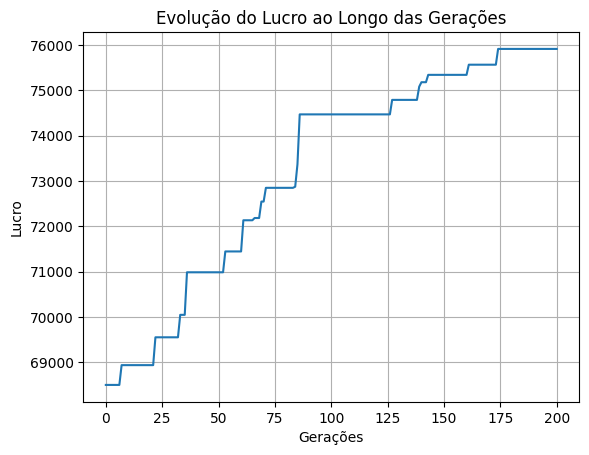

In [121]:
# Execução do algoritmo
melhores = alg_genetico(200, 20)

# Extração dos valores de lucro dos melhores cromossomos
lucros = [lucro for lucro, cromossomo in melhores]

# Criação do gráfico de linhas
plt.plot(lucros)
plt.xlabel('Gerações')
plt.ylabel('Lucro')
plt.title('Evolução do Lucro ao Longo das Gerações')
plt.grid(True)
plt.show()

In [122]:
max(melhores)

(75918.47173588023,
 [42164.321485284294,
  39415.541991763836,
  28135.779851138792,
  6739.354884750019,
  13847.735733601792,
  32443.319022295604])